# Import The Libraries

In [1]:
#import
import sys
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import pickle
from datetime import datetime as dt
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 

# First step to analyze MTA turnstile data

- Read MTA turnstile data files for the following four months of 2018: May, June, July,  Aug.

- Load the files into a pandas DataFrame (pd.read_csv() to load files and pd.concat() to combine DataFrames).

In [2]:
def get_data(week_nums,reset_index=True):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)

#5-May,6-June,7-July,8-Aug
week_nums = [180505,180512,180519,180526,180602, 180609, 180616,180623,180630,180707,180714,180721,180728,180804,180811,180818,180825]
turnstiles_df = get_data(week_nums)

In [3]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,00:00:00,REGULAR,6598847,2235829
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,04:00:00,REGULAR,6598864,2235830
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,08:00:00,REGULAR,6598880,2235863
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,12:00:00,REGULAR,6598961,2235955
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,16:00:00,REGULAR,6599175,2236015


In [4]:
turnstiles_df.sample(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
37108,J007,R377,00-05-00,FLUSHING AV,JM,BMT,04/29/2018,13:00:00,REGULAR,3035,388
111091,PTH01,R549,00-00-0A,NEWARK HW BMEBE,1,PTH,08/09/2018,04:53:01,REGULAR,314238,31691
81910,N329,R201,00-03-04,WOODHAVEN BLVD,MR,IND,05/23/2018,21:00:00,REGULAR,3537228,4003103
54382,N080,R138,00-06-00,W 4 ST-WASH SQ,ABCDEFM,IND,08/04/2018,21:00:00,REGULAR,8049321,11872617
36406,J002,R460,00-06-01,MARCY AV,JMZ,BMT,08/21/2018,05:00:00,REGULAR,227260,884187


In [5]:
turnstiles_df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
197375,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,05:00:00,REGULAR,5554,348
197376,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,09:00:00,REGULAR,5554,348
197377,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,13:00:00,REGULAR,5554,348
197378,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,17:00:00,REGULAR,5554,348
197379,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,21:00:00,REGULAR,5554,348


In [6]:
turnstiles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3344150 entries, 0 to 197379
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [7]:
turnstiles_df.dtypes

C/A                                                                     object
UNIT                                                                    object
SCP                                                                     object
STATION                                                                 object
LINENAME                                                                object
DIVISION                                                                object
DATE                                                                    object
TIME                                                                    object
DESC                                                                    object
ENTRIES                                                                  int64
EXITS                                                                    int64
dtype: object

In [8]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [9]:
turnstiles_df.shape

(3344150, 11)

# Cleaning data set

In [10]:
turnstiles_df.isnull().sum()

C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
dtype: int64

In [11]:
turnstiles_df.columns=[columns.strip() for columns in turnstiles_df.columns]
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

# Convert Date and Time columns into Datatime column

In [12]:
# combine the Date and Time columns into a single new column of the datetime datatype
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [13]:
# Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE" is unique
(turnstiles_df
 .groupby(["C/A","UNIT","SCP","STATION","DATE"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
487886,R417,R222,00-00-02,PARKCHESTER,06/15/2018,51
488354,R417,R222,00-03-01,PARKCHESTER,06/15/2018,51
488003,R417,R222,00-00-03,PARKCHESTER,06/15/2018,51
488705,R417,R222,00-03-04,PARKCHESTER,06/15/2018,51
488588,R417,R222,00-03-03,PARKCHESTER,06/15/2018,51


In [14]:
#drop duplicates 
turnstiles_df.sort_values(["C/A","UNIT","SCP","STATION","DATE_TIME"],inplace=True,ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A","UNIT","SCP","STATION","DATE_TIME"],inplace=True)

Check to verify that ENTRIES for each station dose not duplicates

In [15]:
#count num of ENTRIES for each station
(turnstiles_df.groupby(["C/A","UNIT","SCP","STATION","DATE_TIME"])
.ENTRIES.count()
.reset_index()
.sort_values("ENTRIES",ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2018-04-28 00:00:00,1
2229432,R143,R032,02-03-02,TIMES SQ-42 ST,2018-05-23 08:00:00,1
2229422,R143,R032,02-03-02,TIMES SQ-42 ST,2018-05-21 16:00:00,1
2229423,R143,R032,02-03-02,TIMES SQ-42 ST,2018-05-21 20:00:00,1
2229424,R143,R032,02-03-02,TIMES SQ-42 ST,2018-05-22 00:00:00,1


In [16]:
#count all ENTRIES 
turnstiles_df.ENTRIES.value_counts()

0             54185
1             22206
2             10303
3              7930
117440512      7865
              ...  
6680152           1
6657623           1
209963            1
1382397523        1
7978006           1
Name: ENTRIES, Length: 2404259, dtype: int64

In [17]:
(((turnstiles_df.groupby(["C/A","UNIT","SCP","STATION","DATE_TIME"])
              .ENTRIES.count().reset_index()
              .sort_values("ENTRIES", ascending=False))["ENTRIES"]>1).sum())

0

# No more duplicate Entries

Check to verify that EXITS for each station dose not duplicates

In [18]:
#count num of EXITS for each station
(turnstiles_df.groupby(["C/A","UNIT","SCP","STATION","DATE_TIME"])
.EXITS.count()
.reset_index()
.sort_values("EXITS",ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,EXITS
0,A002,R051,02-00-00,59 ST,2018-04-28 00:00:00,1
2229432,R143,R032,02-03-02,TIMES SQ-42 ST,2018-05-23 08:00:00,1
2229422,R143,R032,02-03-02,TIMES SQ-42 ST,2018-05-21 16:00:00,1
2229423,R143,R032,02-03-02,TIMES SQ-42 ST,2018-05-21 20:00:00,1
2229424,R143,R032,02-03-02,TIMES SQ-42 ST,2018-05-22 00:00:00,1


In [19]:
#count all EXITS 
turnstiles_df.EXITS.value_counts()

0            126345
16777216       8553
65536          3508
3              2865
1              2378
              ...  
4085046           1
455228151         1
4101422           1
12498218          1
539911            1
Name: EXITS, Length: 2233159, dtype: int64

In [20]:
(((turnstiles_df.groupby(["C/A","UNIT","SCP","STATION","DATE_TIME"])
              .EXITS.count().reset_index()
              .sort_values("EXITS", ascending=False))["EXITS"]>1).sum())

0

# No more duplicate EXITS

In [21]:
turnstiles_df["C/A"].unique 

<bound method Series.unique of 197379    TRAM2
197378    TRAM2
197377    TRAM2
197376    TRAM2
197375    TRAM2
          ...  
4          A002
3          A002
2          A002
1          A002
0          A002
Name: C/A, Length: 3344142, dtype: object>

In [22]:
turnstiles_df["UNIT"].unique 

<bound method Series.unique of 197379    R469
197378    R469
197377    R469
197376    R469
197375    R469
          ... 
4         R051
3         R051
2         R051
1         R051
0         R051
Name: UNIT, Length: 3344142, dtype: object>

In [23]:
turnstiles_df["SCP"].unique 

<bound method Series.unique of 197379    00-05-01
197378    00-05-01
197377    00-05-01
197376    00-05-01
197375    00-05-01
            ...   
4         02-00-00
3         02-00-00
2         02-00-00
1         02-00-00
0         02-00-00
Name: SCP, Length: 3344142, dtype: object>

In [24]:
turnstiles_df["STATION"].unique 

<bound method Series.unique of 197379    RIT-ROOSEVELT
197378    RIT-ROOSEVELT
197377    RIT-ROOSEVELT
197376    RIT-ROOSEVELT
197375    RIT-ROOSEVELT
              ...      
4                 59 ST
3                 59 ST
2                 59 ST
1                 59 ST
0                 59 ST
Name: STATION, Length: 3344142, dtype: object>

In [25]:
turnstiles_df["LINENAME"].unique 

<bound method Series.unique of 197379          R
197378          R
197377          R
197376          R
197375          R
           ...   
4         NQR456W
3         NQR456W
2         NQR456W
1         NQR456W
0         NQR456W
Name: LINENAME, Length: 3344142, dtype: object>

In [26]:
turnstiles_df["DIVISION"].unique 

<bound method Series.unique of 197379    RIT
197378    RIT
197377    RIT
197376    RIT
197375    RIT
         ... 
4         BMT
3         BMT
2         BMT
1         BMT
0         BMT
Name: DIVISION, Length: 3344142, dtype: object>

In [27]:
turnstiles_df["DATE"].unique 

<bound method Series.unique of 197379    08/24/2018
197378    08/24/2018
197377    08/24/2018
197376    08/24/2018
197375    08/24/2018
             ...    
4         04/28/2018
3         04/28/2018
2         04/28/2018
1         04/28/2018
0         04/28/2018
Name: DATE, Length: 3344142, dtype: object>

In [28]:
turnstiles_df["TIME"].unique 

<bound method Series.unique of 197379    21:00:00
197378    17:00:00
197377    13:00:00
197376    09:00:00
197375    05:00:00
            ...   
4         16:00:00
3         12:00:00
2         08:00:00
1         04:00:00
0         00:00:00
Name: TIME, Length: 3344142, dtype: object>

In [29]:
turnstiles_df["DESC"].unique 

<bound method Series.unique of 197379    REGULAR
197378    REGULAR
197377    REGULAR
197376    REGULAR
197375    REGULAR
           ...   
4         REGULAR
3         REGULAR
2         REGULAR
1         REGULAR
0         REGULAR
Name: DESC, Length: 3344142, dtype: object>

In [30]:
turnstiles_df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,ENTRIES,EXITS
count,3344142.0,3344142.0
mean,40132830.5,32838072.4
std,207698587.4,191028806.9
min,0.0,0.0
25%,504389.8,241736.0
50%,2527887.0,1437623.5
75%,6923465.8,4822224.2
max,2144892848.0,2146093333.0


In [31]:
turnstiles_df.DATE.value_counts().sort_index()

04/28/2018    28099
04/29/2018    28172
04/30/2018    28259
05/01/2018    28218
05/02/2018    28176
              ...  
08/20/2018    28254
08/21/2018    28095
08/22/2018    28647
08/23/2018    28726
08/24/2018    27952
Name: DATE, Length: 119, dtype: int64

In [32]:
# remove  the other month
mask=((turnstiles_df["DATE"]=="04/28/2018")|
      (turnstiles_df["DATE"]=="04/29/2018")|
      (turnstiles_df["DATE"]=="04/30/2018"))
turnstiles_df2=turnstiles_df[~mask]

In [33]:
turnstiles_df2.DATE.value_counts().sort_index()

05/01/2018    28218
05/02/2018    28176
05/03/2018    28186
05/04/2018    28092
05/05/2018    28093
              ...  
08/20/2018    28254
08/21/2018    28095
08/22/2018    28647
08/23/2018    28726
08/24/2018    27952
Name: DATE, Length: 116, dtype: int64

# Drop Unnecessary columns

In [34]:
# Drop Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored
turnstiles_df2 = turnstiles_df2.drop(["DESC"], axis=1, errors="ignore")

In [35]:
turnstiles_df2.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'ENTRIES', 'EXITS', 'DATE_TIME'],
      dtype='object')

In [36]:
turnstiles_df2.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME
197379,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,21:00:00,5554,348,2018-08-24 21:00:00
197378,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,17:00:00,5554,348,2018-08-24 17:00:00
197377,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,13:00:00,5554,348,2018-08-24 13:00:00
197376,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,09:00:00,5554,348,2018-08-24 09:00:00
197375,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,05:00:00,5554,348,2018-08-24 05:00:00


# created a new column named "DAY_NAME" and "TIME"

In [37]:
turnstiles_df2["DAY_NAME"]= turnstiles_df2["DATE_TIME"].dt.day_name()

In [38]:
turnstiles_df2.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,DAY_NAME
197379,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,21:00:00,5554,348,2018-08-24 21:00:00,Friday
197378,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,17:00:00,5554,348,2018-08-24 17:00:00,Friday
197377,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,13:00:00,5554,348,2018-08-24 13:00:00,Friday
197376,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,09:00:00,5554,348,2018-08-24 09:00:00,Friday
197375,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,05:00:00,5554,348,2018-08-24 05:00:00,Friday


In [39]:
turnstiles_df2.DAY_NAME.value_counts()

Tuesday      479189
Friday       478760
Thursday     478138
Wednesday    477518
Monday       449490
Sunday       448570
Saturday     447947
Name: DAY_NAME, dtype: int64

# Daily Entries and Exits

- In this project we would to calculate turnstiles_daily_ENTRIES and turnstiles_daily_EXITS
To Know the number of new ENTRIES\EXITS gained each day

# 1- Daily_ENTRIES

In [40]:
turnstiles_daily_ENTRIES = (turnstiles_df2
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME","DAY_NAME"],as_index=False)
                        ["ENTRIES","EXITS"].first())

<ipython-input-40-9dcd5a6e590a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily_ENTRIES = (turnstiles_df2


In [41]:
turnstiles_daily_ENTRIES.head()

,C/A,UNIT,SCP,STATION,DATE_TIME,DAY_NAME,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,2018-05-01 00:00:00,Tuesday,6601762,2236852
1,A002,R051,02-00-00,59 ST,2018-05-01 04:00:00,Tuesday,6601772,2236857
2,A002,R051,02-00-00,59 ST,2018-05-01 08:00:00,Tuesday,6601823,2236982
3,A002,R051,02-00-00,59 ST,2018-05-01 12:00:00,Tuesday,6601997,2237242
4,A002,R051,02-00-00,59 ST,2018-05-01 16:00:00,Tuesday,6602286,2237312


In [43]:
turnstiles_daily_ENTRIES[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily_ENTRIES
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE_TIME", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)));

<ipython-input-43-5262fb4c137c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily_ENTRIES[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily_ENTRIES


In [44]:
turnstiles_daily_ENTRIES.head()

,C/A,UNIT,SCP,STATION,DATE_TIME,DAY_NAME,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,2018-05-01 00:00:00,Tuesday,6601762,2236852,NaT,NaN
1,A002,R051,02-00-00,59 ST,2018-05-01 04:00:00,Tuesday,6601772,2236857,2018-05-01 00:00:00,6601762.0
2,A002,R051,02-00-00,59 ST,2018-05-01 08:00:00,Tuesday,6601823,2236982,2018-05-01 04:00:00,6601772.0
3,A002,R051,02-00-00,59 ST,2018-05-01 12:00:00,Tuesday,6601997,2237242,2018-05-01 08:00:00,6601823.0
4,A002,R051,02-00-00,59 ST,2018-05-01 16:00:00,Tuesday,6602286,2237312,2018-05-01 12:00:00,6601997.0


In [45]:
turnstiles_daily_ENTRIES[turnstiles_daily_ENTRIES["ENTRIES"] < turnstiles_daily_ENTRIES["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE_TIME,DAY_NAME,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES
6807,A002,R051,02-05-00,59 ST,2018-08-01 08:00:00,Wednesday,1,0,2018-08-01 04:00:00,1565.0
13115,A006,R079,00-03-01,5 AV/59 ST,2018-08-08 18:00:00,Wednesday,488,64,2018-08-08 06:00:00,2997549.0
23059,A010,R080,00-00-07,57 ST-7 AV,2018-05-10 16:00:00,Thursday,114,10,2018-05-10 12:00:00,29163426.0
23705,A011,R080,01-00-00,57 ST-7 AV,2018-05-01 04:00:00,Tuesday,885930296,491503388,2018-05-01 00:00:00,885930298.0
23706,A011,R080,01-00-00,57 ST-7 AV,2018-05-01 07:14:35,Tuesday,885930290,491503012,2018-05-01 04:00:00,885930296.0


In [46]:
# Drop null
turnstiles_daily_ENTRIES.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [47]:
turnstiles_daily_ENTRIES.head()

,C/A,UNIT,SCP,STATION,DATE_TIME,DAY_NAME,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,2018-05-01 04:00:00,Tuesday,6601772,2236857,2018-05-01 00:00:00,6601762.0
2,A002,R051,02-00-00,59 ST,2018-05-01 08:00:00,Tuesday,6601823,2236982,2018-05-01 04:00:00,6601772.0
3,A002,R051,02-00-00,59 ST,2018-05-01 12:00:00,Tuesday,6601997,2237242,2018-05-01 08:00:00,6601823.0
4,A002,R051,02-00-00,59 ST,2018-05-01 16:00:00,Tuesday,6602286,2237312,2018-05-01 12:00:00,6601997.0
5,A002,R051,02-00-00,59 ST,2018-05-01 20:00:00,Tuesday,6603075,2237383,2018-05-01 16:00:00,6602286.0


In [48]:
turnstiles_daily_ENTRIES.tail()

,C/A,UNIT,SCP,STATION,DATE_TIME,DAY_NAME,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES
3259607,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2018-08-24 05:00:00,Friday,5554,348,2018-08-24 01:00:00,5554.0
3259608,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2018-08-24 09:00:00,Friday,5554,348,2018-08-24 05:00:00,5554.0
3259609,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2018-08-24 13:00:00,Friday,5554,348,2018-08-24 09:00:00,5554.0
3259610,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2018-08-24 17:00:00,Friday,5554,348,2018-08-24 13:00:00,5554.0
3259611,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2018-08-24 21:00:00,Friday,5554,348,2018-08-24 17:00:00,5554.0


In [49]:
(((turnstiles_df2.groupby(["C/A","UNIT","SCP","STATION","DATE_TIME"])
              .ENTRIES.count().reset_index()
              .sort_values("ENTRIES", ascending=False))["ENTRIES"]>1).sum())

0

In [50]:
# Check the counter being in reverse!
mask = ((turnstiles_df2["C/A"] == "A011") & 
(turnstiles_df2["UNIT"] == "R080") & 
(turnstiles_df2["SCP"] == "01-00-00") & 
(turnstiles_df2["STATION"] == "57 ST-7 AV") &
(turnstiles_df2["DATE_TIME"].dt.date == datetime.datetime(2018, 5,1).date()))
turnstiles_df2[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,DAY_NAME
1453,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,05/01/2018,20:00:00,885929999,491498845,2018-05-01 20:00:00,Tuesday
1452,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,05/01/2018,16:00:00,885930164,491499766,2018-05-01 16:00:00,Tuesday
1451,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,05/01/2018,12:00:00,885930221,491500585,2018-05-01 12:00:00,Tuesday
1450,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,05/01/2018,08:00:00,885930287,491502648,2018-05-01 08:00:00,Tuesday
1449,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,05/01/2018,07:18:45,885930289,491502989,2018-05-01 07:18:45,Tuesday


Counter working in Reverse?

In [51]:
(turnstiles_daily_ENTRIES[turnstiles_daily_ENTRIES["ENTRIES"] < turnstiles_daily_ENTRIES["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A    UNIT  SCP       STATION        
A002   R051  02-05-00  59 ST                1
A006   R079  00-03-01  5 AV/59 ST           1
A010   R080  00-00-07  57 ST-7 AV           1
A011   R080  01-00-00  57 ST-7 AV         691
A025   R023  01-03-01  34 ST-HERALD SQ    693
                                         ... 
R627   R063  00-03-01  SUTTER AV-RUTLD      1
R646   R110  01-00-01  FLATBUSH AV-B.C    688
R730   R431  00-00-04  EASTCHSTER/DYRE    649
S101A  R070  01-00-05  ST. GEORGE           1
TRAM1  R468  00-00-00  RIT-MANHATTAN        1
Length: 335, dtype: int64

In [52]:
def get_daily_counts_ENTRIES(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
turnstiles_daily_ENTRIES["DAILY_ENTRIES"]= turnstiles_daily_ENTRIES.apply(get_daily_counts_ENTRIES, axis=1, max_counter=1000000)

488 2997549.0
114 29163426.0
524296 1535945.0
7 1646681283.0
39 4111454.0
552547867 2106.0
338 1813703.0
3584210 16809292.0
433 5074202.0
50386730 254800.0
122 50386730.0
458763 4365358.0
16824342 102581.0
134 1949067.0
174 3956142.0
353 4451954.0
319 2944492.0
52 1071940.0
62 2411616.0
1442830408 11142660.0
7 4709092.0
10 2479313.0
1114281 6565.0
348 20220123.0
107 11178676.0
1208002150 4781477.0
3794852 812861.0
12 3794871.0
54 1149724.0
17 1320446.0
33604922 145092.0
33602414 158393.0
169 1685045.0
0 1122816.0
218572142 118342934.0
1493118270 10963364.0
44507993 1493040918.0
704645171 2783736.0
16 5890270.0
1282912405 239.0
10 1282912405.0
30 1580082.0
2067430671 910999.0
2067447699 2242569.0
1349914 2067431093.0
5105581 1349335.0
8781866 4718825.0
119 7015818.0
458761 151252604.0
44 9652856.0
621072165 2252127.0
2252257 621072165.0
0 50331648.0
74 871938174.0
44 4648569.0
458759 67192668.0
44 1752712.0
117444532 136656341.0
65 1066413.0
1067077 65.0
141 1067077.0
1073104 909.0
1171

In [53]:
turnstiles_daily_ENTRIES.head()

,C/A,UNIT,SCP,STATION,DATE_TIME,DAY_NAME,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,2018-05-01 04:00:00,Tuesday,6601772,2236857,2018-05-01 00:00:00,6601762.0,10.0
2,A002,R051,02-00-00,59 ST,2018-05-01 08:00:00,Tuesday,6601823,2236982,2018-05-01 04:00:00,6601772.0,51.0
3,A002,R051,02-00-00,59 ST,2018-05-01 12:00:00,Tuesday,6601997,2237242,2018-05-01 08:00:00,6601823.0,174.0
4,A002,R051,02-00-00,59 ST,2018-05-01 16:00:00,Tuesday,6602286,2237312,2018-05-01 12:00:00,6601997.0,289.0
5,A002,R051,02-00-00,59 ST,2018-05-01 20:00:00,Tuesday,6603075,2237383,2018-05-01 16:00:00,6602286.0,789.0


In [55]:
station_daily_ENTRIES= turnstiles_daily_ENTRIES.groupby(["STATION", "DATE_TIME"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily_ENTRIES.head()

,STATION,DATE_TIME,DAILY_ENTRIES
0,1 AV,2018-05-01 04:00:00,390.0
1,1 AV,2018-05-01 08:00:00,1694.0
2,1 AV,2018-05-01 12:00:00,4719.0
3,1 AV,2018-05-01 16:00:00,4795.0
4,1 AV,2018-05-01 20:00:00,6952.0


# stations with the highest traffic 

In [56]:
station_totals_ENTRIES = station_daily_ENTRIES.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()

station_totals_ENTRIES.head(10)

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,16642793.0
1,GRD CNTRL-42 ST,15160110.0
2,JOURNAL SQUARE,14168953.0
3,34 ST-HERALD SQ,12903342.0
4,23 ST,10791668.0
5,TIMES SQ-42 ST,10754857.0
6,14 ST-UNION SQ,10743310.0
7,FULTON ST,10571047.0
8,42 ST-PORT AUTH,10563551.0
9,PATH NEW WTC,9612068.0


In [57]:
single_turnstiles_ENTRIES=turnstiles_df2[(turnstiles_df2["C/A"] == "R142") & 
                                           (turnstiles_df2["SCP"] == "01-06-01") & 
                                           (turnstiles_df2["UNIT"] == "R293") & 
                                           (turnstiles_df2["STATION"] == "34 ST-PENN STA")]
single_turnstiles_ENTRIES.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,DAY_NAME
130891,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,08/24/2018,22:00:00,67701040,17992217,2018-08-24 22:00:00,Friday
130890,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,08/24/2018,18:00:00,67700869,17991931,2018-08-24 18:00:00,Friday
130889,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,08/24/2018,14:00:00,67700602,17991534,2018-08-24 14:00:00,Friday
130888,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,08/24/2018,10:00:00,67700434,17991174,2018-08-24 10:00:00,Friday
130887,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,08/24/2018,06:00:00,67700353,17990696,2018-08-24 06:00:00,Friday


In [58]:
station_daily_34=station_daily_ENTRIES[station_daily_ENTRIES['STATION']=='34 ST-PENN STA']
station_daily_34.head()

,STATION,DATE_TIME,DAILY_ENTRIES
55372,34 ST-PENN STA,2018-05-01 04:00:00,1232.0
55373,34 ST-PENN STA,2018-05-01 06:00:00,789.0
55374,34 ST-PENN STA,2018-05-01 08:00:00,16627.0
55375,34 ST-PENN STA,2018-05-01 10:00:00,23508.0
55376,34 ST-PENN STA,2018-05-01 12:00:00,37719.0


# To find the top 10 traffic stations

This project takes the top 10 stations with DAILY_ENTRIES, then we group by station only to avoid the duplicate station

In [59]:
Top_10_station_ENTRIES=station_totals_ENTRIES.head(10)
Top_10_station_ENTRIES

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,16642793.0
1,GRD CNTRL-42 ST,15160110.0
2,JOURNAL SQUARE,14168953.0
3,34 ST-HERALD SQ,12903342.0
4,23 ST,10791668.0
5,TIMES SQ-42 ST,10754857.0
6,14 ST-UNION SQ,10743310.0
7,FULTON ST,10571047.0
8,42 ST-PORT AUTH,10563551.0
9,PATH NEW WTC,9612068.0


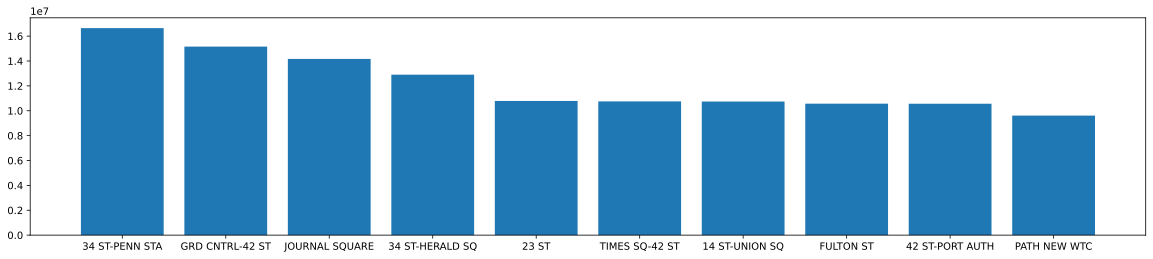

In [60]:
plt.subplots(figsize=(20,4))
plt.bar(Top_10_station_ENTRIES['STATION'], Top_10_station_ENTRIES['DAILY_ENTRIES']);
plt.savefig('Top_10_station_ENTRIE.png',dpi=300, bbox_inches='tight')

In [63]:
station_daily_34['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_34['DATE_TIME']).dt.dayofweek
station_daily_34['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_34['DATE_TIME']).dt.week
station_daily_34.head()

<ipython-input-63-0db8e90a8d20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_daily_34['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_34['DATE_TIME']).dt.dayofweek
<ipython-input-63-0db8e90a8d20>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  station_daily_34['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_34['DATE_TIME']).dt.week
<ipython-input-63-0db8e90a8d20>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

,STATION,DATE_TIME,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
55372,34 ST-PENN STA,2018-05-01 04:00:00,1232.0,1,18
55373,34 ST-PENN STA,2018-05-01 06:00:00,789.0,1,18
55374,34 ST-PENN STA,2018-05-01 08:00:00,16627.0,1,18
55375,34 ST-PENN STA,2018-05-01 10:00:00,23508.0,1,18
55376,34 ST-PENN STA,2018-05-01 12:00:00,37719.0,1,18


In [64]:
top10_stations_ENTRIES = (station_daily_ENTRIES.groupby(['STATION'])['DAILY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_ENTRIES',ascending=False) 
                   .STATION.head(10))

In [65]:
station_daily_top10_ENTRIES = station_daily_ENTRIES[station_daily_ENTRIES['STATION']
                                    .isin(top10_stations_ENTRIES)].sort_values(by = 'DAILY_ENTRIES', ascending = False)

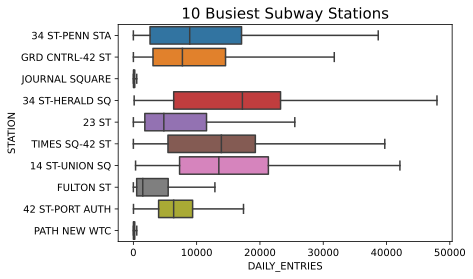

In [66]:
sns.boxplot(x='DAILY_ENTRIES', y='STATION', data=station_daily_top10_ENTRIES, order = top10_stations_ENTRIES, \
            showfliers = False).set_title('10 Busiest Subway Stations', size = 15);
plt.savefig('Top_10_station_ENTRIE(boxplot).png',dpi=300, bbox_inches='tight')

# 2- Daily_EXITS

In [71]:
turnstiles_daily_EXITS = (turnstiles_df2
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME","DAY_NAME"],as_index=False)
                        ["ENTRIES","EXITS"].first())

<ipython-input-71-929398b1d4e2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily_EXITS = (turnstiles_df2


In [72]:
turnstiles_daily_EXITS.head()

,C/A,UNIT,SCP,STATION,DATE_TIME,DAY_NAME,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,2018-05-01 00:00:00,Tuesday,6601762,2236852
1,A002,R051,02-00-00,59 ST,2018-05-01 04:00:00,Tuesday,6601772,2236857
2,A002,R051,02-00-00,59 ST,2018-05-01 08:00:00,Tuesday,6601823,2236982
3,A002,R051,02-00-00,59 ST,2018-05-01 12:00:00,Tuesday,6601997,2237242
4,A002,R051,02-00-00,59 ST,2018-05-01 16:00:00,Tuesday,6602286,2237312


In [74]:
turnstiles_daily_EXITS[["PREV_DATE", "PREV_EXITS"]] = (turnstiles_daily_EXITS
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE_TIME", "EXITS"]
                                                       .apply(lambda grp: grp.shift(1)));

<ipython-input-74-d95655349bc8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily_EXITS[["PREV_DATE", "PREV_EXITS"]] = (turnstiles_daily_EXITS


In [75]:
turnstiles_daily_EXITS.head()

,C/A,UNIT,SCP,STATION,DATE_TIME,DAY_NAME,ENTRIES,EXITS,PREV_DATE,PREV_EXITS
0,A002,R051,02-00-00,59 ST,2018-05-01 00:00:00,Tuesday,6601762,2236852,NaT,NaN
1,A002,R051,02-00-00,59 ST,2018-05-01 04:00:00,Tuesday,6601772,2236857,2018-05-01 00:00:00,2236852.0
2,A002,R051,02-00-00,59 ST,2018-05-01 08:00:00,Tuesday,6601823,2236982,2018-05-01 04:00:00,2236857.0
3,A002,R051,02-00-00,59 ST,2018-05-01 12:00:00,Tuesday,6601997,2237242,2018-05-01 08:00:00,2236982.0
4,A002,R051,02-00-00,59 ST,2018-05-01 16:00:00,Tuesday,6602286,2237312,2018-05-01 12:00:00,2237242.0


In [76]:
turnstiles_daily_EXITS[turnstiles_daily_EXITS["EXITS"] < turnstiles_daily_EXITS["PREV_EXITS"]].head()

,C/A,UNIT,SCP,STATION,DATE_TIME,DAY_NAME,ENTRIES,EXITS,PREV_DATE,PREV_EXITS
13115,A006,R079,00-03-01,5 AV/59 ST,2018-08-08 18:00:00,Wednesday,488,64,2018-08-08 06:00:00,1595642.0
23059,A010,R080,00-00-07,57 ST-7 AV,2018-05-10 16:00:00,Thursday,114,10,2018-05-10 12:00:00,5839558.0
23705,A011,R080,01-00-00,57 ST-7 AV,2018-05-01 04:00:00,Tuesday,885930296,491503388,2018-05-01 00:00:00,491503410.0
23706,A011,R080,01-00-00,57 ST-7 AV,2018-05-01 07:14:35,Tuesday,885930290,491503012,2018-05-01 04:00:00,491503388.0
23707,A011,R080,01-00-00,57 ST-7 AV,2018-05-01 07:16:00,Tuesday,885930290,491503006,2018-05-01 07:14:35,491503012.0


In [77]:
# Drop null
turnstiles_daily_EXITS.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [78]:
turnstiles_daily_EXITS.head()

,C/A,UNIT,SCP,STATION,DATE_TIME,DAY_NAME,ENTRIES,EXITS,PREV_DATE,PREV_EXITS
1,A002,R051,02-00-00,59 ST,2018-05-01 04:00:00,Tuesday,6601772,2236857,2018-05-01 00:00:00,2236852.0
2,A002,R051,02-00-00,59 ST,2018-05-01 08:00:00,Tuesday,6601823,2236982,2018-05-01 04:00:00,2236857.0
3,A002,R051,02-00-00,59 ST,2018-05-01 12:00:00,Tuesday,6601997,2237242,2018-05-01 08:00:00,2236982.0
4,A002,R051,02-00-00,59 ST,2018-05-01 16:00:00,Tuesday,6602286,2237312,2018-05-01 12:00:00,2237242.0
5,A002,R051,02-00-00,59 ST,2018-05-01 20:00:00,Tuesday,6603075,2237383,2018-05-01 16:00:00,2237312.0


In [79]:
(((turnstiles_df2.groupby(["C/A","UNIT","SCP","STATION","DATE_TIME"])
              .EXITS.count().reset_index()
              .sort_values("EXITS", ascending=False))["EXITS"]>1).sum())

0

In [80]:
# Check the counter being in reverse!
mask = ((turnstiles_df2["C/A"] == "A011") & 
(turnstiles_df2["UNIT"] == "R080") & 
(turnstiles_df2["SCP"] == "01-00-00") & 
(turnstiles_df2["STATION"] == "57 ST-7 AV") &
(turnstiles_df2["DATE_TIME"].dt.date == datetime.datetime(2018, 5,1).date()))
turnstiles_df2[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,DAY_NAME
1453,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,05/01/2018,20:00:00,885929999,491498845,2018-05-01 20:00:00,Tuesday
1452,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,05/01/2018,16:00:00,885930164,491499766,2018-05-01 16:00:00,Tuesday
1451,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,05/01/2018,12:00:00,885930221,491500585,2018-05-01 12:00:00,Tuesday
1450,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,05/01/2018,08:00:00,885930287,491502648,2018-05-01 08:00:00,Tuesday
1449,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,05/01/2018,07:18:45,885930289,491502989,2018-05-01 07:18:45,Tuesday


In [81]:
(turnstiles_daily_ENTRIES[turnstiles_daily_ENTRIES["ENTRIES"] < turnstiles_daily_ENTRIES["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A    UNIT  SCP       STATION        
A002   R051  02-05-00  59 ST                1
A006   R079  00-03-01  5 AV/59 ST           1
A010   R080  00-00-07  57 ST-7 AV           1
A011   R080  01-00-00  57 ST-7 AV         691
A025   R023  01-03-01  34 ST-HERALD SQ    693
                                         ... 
R627   R063  00-03-01  SUTTER AV-RUTLD      1
R646   R110  01-00-01  FLATBUSH AV-B.C    688
R730   R431  00-00-04  EASTCHSTER/DYRE    649
S101A  R070  01-00-05  ST. GEORGE           1
TRAM1  R468  00-00-00  RIT-MANHATTAN        1
Length: 335, dtype: int64

In [82]:
def get_daily_counts_EXITS(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["EXITS"], row["PREV_EXITS"])
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
turnstiles_daily_EXITS["DAILY_EXITS"]= turnstiles_daily_EXITS.apply(get_daily_counts_EXITS, axis=1, max_counter=1000000)

64 1595642.0
10 5839558.0
19 4779756.0
0 1057706504.0
1897275638 251.0
5 4900491.0
2528773 16996250.0
139 2512510.0
67129323 302254.0
160 67129323.0
7 3474948.0
266 3271172.0
102 1741416.0
3 2240840.0
1845433321 9581788.0
0 3592721.0
367 43143571.0
127 12363280.0
1761652640 6906115.0
2 1801244.0
4 1917508.0
4 1087078.0
486582575 1904808.0
167785528 665138.0
78 1696794.0
167773994 700919.0
1845550240 7244500.0
24002622 1845583147.0
704701671 2774737.0
15 5018482.0
1706222667 112.0
0 1706222667.0
69 1146393.0
289 11037803.0
681793659 173708.0
681802608 828506.0
1168683 681794187.0
1099 7836557.0
2 100814373.0
21 7502817.0
369287624 4172250.0
4172563 369287624.0
1 16778561.0
34 2029893655.0
29 5491810.0
5 16892667.0
114 2610683.0
4467 1681200.0
1330451 104372.0
104373 1330451.0
0 1483674.0
1484706 0.0
0 1484706.0
1485199 0.0
0 1485199.0
1485856 0.0
0 1069292.0
0 1087517.0
2299098 245424.0
245449 2299098.0
209 1666783.0
319 1640987.0
173 34068694.0
314 2397721.0
11 16867775.0
620812353 244

In [84]:
station_daily_EXITS = turnstiles_daily_EXITS.groupby(["STATION", "DATE_TIME"])[['DAILY_EXITS']].sum().reset_index()
station_daily_EXITS.head()

,STATION,DATE_TIME,DAILY_EXITS
0,1 AV,2018-05-01 04:00:00,341.0
1,1 AV,2018-05-01 08:00:00,3537.0
2,1 AV,2018-05-01 12:00:00,6079.0
3,1 AV,2018-05-01 16:00:00,4089.0
4,1 AV,2018-05-01 20:00:00,6234.0


stations with the highest traffic

In [85]:
station_totals_EXITS = station_daily_EXITS.groupby('STATION').sum()\
    .sort_values('DAILY_EXITS', ascending=False)\
    .reset_index()

station_totals_EXITS.head(10)

,STATION,DAILY_EXITS
0,JOURNAL SQUARE,38270193.0
1,GRD CNTRL-42 ST,15439667.0
2,34 ST-PENN STA,14443714.0
3,34 ST-HERALD SQ,11489410.0
4,TIMES SQ-42 ST,9985390.0
5,14 ST-UNION SQ,9644813.0
6,PATH NEW WTC,9344345.0
7,FULTON ST,8290819.0
8,42 ST-PORT AUTH,8003828.0
9,23 ST,7774228.0


In [86]:
mask=turnstiles_df2[(turnstiles_df2["STATION"] == "GRD CNTRL-42 ST")]
mask.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,DAY_NAME
152956,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,08/24/2018,21:00:00,376901,15151,2018-08-24 21:00:00,Friday
152955,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,08/24/2018,17:00:00,376560,15141,2018-08-24 17:00:00,Friday
152954,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,08/24/2018,13:00:00,376340,15135,2018-08-24 13:00:00,Friday
152953,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,08/24/2018,09:00:00,376272,15125,2018-08-24 09:00:00,Friday
152952,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,08/24/2018,05:00:01,376212,15120,2018-08-24 05:00:01,Friday


In [87]:
single_turnstiles_EXITS=turnstiles_df2[(turnstiles_df2["C/A"] == "R241A") & 
                                 (turnstiles_df2["SCP"] == "00-00-04") & 
                                 (turnstiles_df2["UNIT"] == "R048") & 
                                 (turnstiles_df2["STATION"] == "GRD CNTRL-42 ST")]
single_turnstiles_EXITS.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,DAY_NAME
152956,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,08/24/2018,21:00:00,376901,15151,2018-08-24 21:00:00,Friday
152955,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,08/24/2018,17:00:00,376560,15141,2018-08-24 17:00:00,Friday
152954,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,08/24/2018,13:00:00,376340,15135,2018-08-24 13:00:00,Friday
152953,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,08/24/2018,09:00:00,376272,15125,2018-08-24 09:00:00,Friday
152952,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,08/24/2018,05:00:01,376212,15120,2018-08-24 05:00:01,Friday


In [88]:
station_daily_42=station_daily_EXITS[station_daily_EXITS['STATION']=='GRD CNTRL-42 ST']
station_daily_42.head()

,STATION,DATE_TIME,DAILY_EXITS
221821,GRD CNTRL-42 ST,2018-05-01 04:00:00,557.0
221822,GRD CNTRL-42 ST,2018-05-01 05:00:00,225.0
221823,GRD CNTRL-42 ST,2018-05-01 08:00:00,9457.0
221824,GRD CNTRL-42 ST,2018-05-01 09:00:00,20994.0
221825,GRD CNTRL-42 ST,2018-05-01 12:00:00,25058.0


# To find the top 10 traffic stations 

This project takes the top 10 stations with DAILY_EXITS, then we group by station only to avoid the duplicate station

In [89]:
Top_10_station_EXITS=station_totals_EXITS.head(10)
Top_10_station_EXITS

,STATION,DAILY_EXITS
0,JOURNAL SQUARE,38270193.0
1,GRD CNTRL-42 ST,15439667.0
2,34 ST-PENN STA,14443714.0
3,34 ST-HERALD SQ,11489410.0
4,TIMES SQ-42 ST,9985390.0
5,14 ST-UNION SQ,9644813.0
6,PATH NEW WTC,9344345.0
7,FULTON ST,8290819.0
8,42 ST-PORT AUTH,8003828.0
9,23 ST,7774228.0


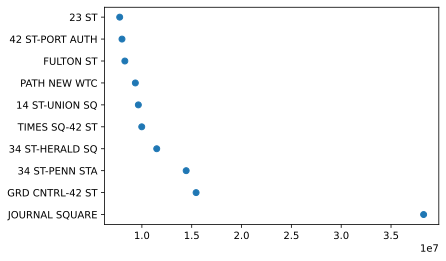

In [90]:
plt.scatter(Top_10_station_EXITS['DAILY_EXITS'], Top_10_station_EXITS['STATION']);
plt.savefig('Top_10_station_EXITS(scatter).png',dpi=300, bbox_inches='tight')

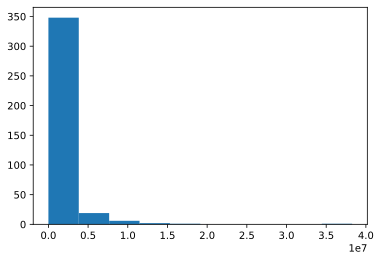

In [91]:
plt.hist(station_totals_EXITS['DAILY_EXITS']);
plt.savefig('Top_10_station_EXITS(hist).png',dpi=300, bbox_inches='tight')

In [92]:
top10_stations_EXITS= (station_daily_EXITS.groupby(['STATION'])['DAILY_EXITS'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_EXITS',ascending=False) 
                   .STATION.head(10))

In [93]:
station_daily_top10_EXITS = station_daily_EXITS[station_daily_EXITS['STATION']
                                    .isin(top10_stations_EXITS)].sort_values(by = 'DAILY_EXITS', ascending = False)

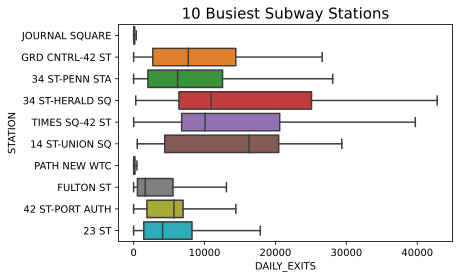

In [94]:
sns.boxplot(x='DAILY_EXITS', y='STATION', data=station_daily_top10_EXITS, order = top10_stations_EXITS, \
            showfliers = False).set_title('10 Busiest Subway Stations', size = 15);
plt.savefig('Top_10_station_EXITS(boxplot).png',dpi=300, bbox_inches='tight')

# ENTRIES & EXITS

In [95]:
turnstiles_df2.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,DAY_NAME
197379,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,21:00:00,5554,348,2018-08-24 21:00:00,Friday
197378,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,17:00:00,5554,348,2018-08-24 17:00:00,Friday
197377,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,13:00:00,5554,348,2018-08-24 13:00:00,Friday
197376,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,09:00:00,5554,348,2018-08-24 09:00:00,Friday
197375,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,05:00:00,5554,348,2018-08-24 05:00:00,Friday


In [96]:
turnstiles_daily_ENTRIES.head()

,C/A,UNIT,SCP,STATION,DATE_TIME,DAY_NAME,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,2018-05-01 04:00:00,Tuesday,6601772,2236857,2018-05-01 00:00:00,6601762.0,10.0
2,A002,R051,02-00-00,59 ST,2018-05-01 08:00:00,Tuesday,6601823,2236982,2018-05-01 04:00:00,6601772.0,51.0
3,A002,R051,02-00-00,59 ST,2018-05-01 12:00:00,Tuesday,6601997,2237242,2018-05-01 08:00:00,6601823.0,174.0
4,A002,R051,02-00-00,59 ST,2018-05-01 16:00:00,Tuesday,6602286,2237312,2018-05-01 12:00:00,6601997.0,289.0
5,A002,R051,02-00-00,59 ST,2018-05-01 20:00:00,Tuesday,6603075,2237383,2018-05-01 16:00:00,6602286.0,789.0


In [97]:
turnstiles_daily_EXITS.head()

,C/A,UNIT,SCP,STATION,DATE_TIME,DAY_NAME,ENTRIES,EXITS,PREV_DATE,PREV_EXITS,DAILY_EXITS
1,A002,R051,02-00-00,59 ST,2018-05-01 04:00:00,Tuesday,6601772,2236857,2018-05-01 00:00:00,2236852.0,5.0
2,A002,R051,02-00-00,59 ST,2018-05-01 08:00:00,Tuesday,6601823,2236982,2018-05-01 04:00:00,2236857.0,125.0
3,A002,R051,02-00-00,59 ST,2018-05-01 12:00:00,Tuesday,6601997,2237242,2018-05-01 08:00:00,2236982.0,260.0
4,A002,R051,02-00-00,59 ST,2018-05-01 16:00:00,Tuesday,6602286,2237312,2018-05-01 12:00:00,2237242.0,70.0
5,A002,R051,02-00-00,59 ST,2018-05-01 20:00:00,Tuesday,6603075,2237383,2018-05-01 16:00:00,2237312.0,71.0


# Add column that count daily traffic

In [98]:
turnstiles_df2['DAILY_EXITS']=turnstiles_daily_EXITS['DAILY_EXITS']

In [99]:
turnstiles_df2['DAILY_ENTRIES']=turnstiles_daily_ENTRIES['DAILY_ENTRIES']

In [100]:
turnstiles_df2['TRAFFIC'] = turnstiles_df2['DAILY_ENTRIES'] + turnstiles_df2['DAILY_EXITS']


In [101]:
turnstiles_df2.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,DAY_NAME,DAILY_EXITS,DAILY_ENTRIES,TRAFFIC
197379,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,21:00:00,5554,348,2018-08-24 21:00:00,Friday,0.0,22.0,22.0
197378,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,17:00:00,5554,348,2018-08-24 17:00:00,Friday,16.0,255.0,271.0
197377,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,13:00:00,5554,348,2018-08-24 13:00:00,Friday,21.0,217.0,238.0
197376,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,09:00:00,5554,348,2018-08-24 09:00:00,Friday,24.0,117.0,141.0
197375,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,05:00:00,5554,348,2018-08-24 05:00:00,Friday,4.0,4.0,8.0


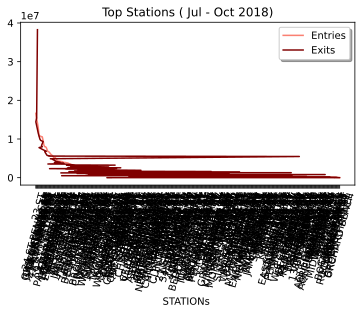

In [102]:
fig=plt.figure(figsize=(6, 3))


plt.plot(station_totals_ENTRIES.STATION,station_totals_ENTRIES.DAILY_ENTRIES, color='salmon')
plt.plot(station_totals_EXITS.STATION,station_totals_EXITS.DAILY_EXITS, color='maroon')
plt.title('Top Stations ( Jul - Oct 2018)')
plt.xlabel('STATIONs ')
#plt.ylabel('DAILY ENTRIES AND DAILY EXITS')
plt.xticks(rotation=75)
plt.legend(['Entries','Exits'],shadow = True, loc = 0);
plt.savefig('entries_exits.png',dpi=300, bbox_inches='tight')

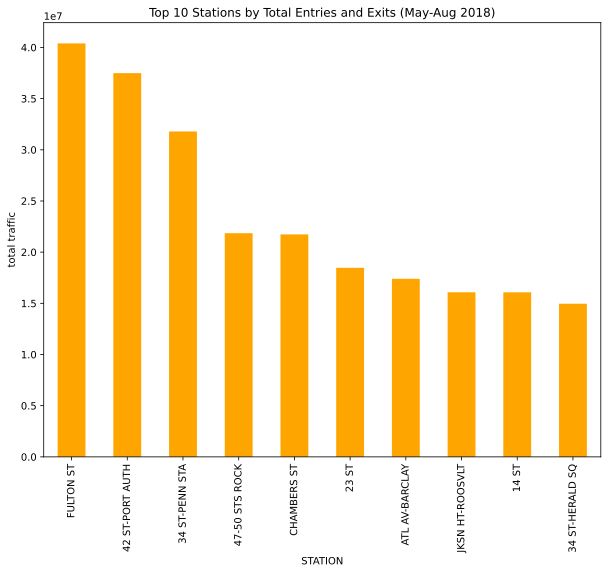

In [103]:
top_10 =turnstiles_df2.groupby(['STATION']).agg({'TRAFFIC': sum}).sort_values(by = 'TRAFFIC', ascending = False).head(10)

fig, ax = plt.subplots(figsize=(10, 8))
top_10.sort_values(by = 'TRAFFIC',ascending=False).plot(kind='bar', color ='orange',ax=ax)
ax.set(title='Top 10 Stations by Total Entries and Exits (May-Aug 2018)', xlabel='STATION', ylabel='total traffic')
ax.legend().set_visible(False)
plt.savefig('Top 10 Stations by Total Entries and Exits (May-Aug 2018).png',dpi=300, bbox_inches='tight')

# Add data set to DB

In [104]:
engine=create_engine("sqlite://",echo=False) 
turnstiles_df2.to_sql("mtaps",con=engine)

Some Queries we applied on The data

In [105]:
turnstiles_df2=pd.read_sql('select * from mtaps limit 10;',engine) 
turnstiles_df2

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,DAY_NAME,DAILY_EXITS,DAILY_ENTRIES,TRAFFIC
0,197379,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,21:00:00,5554,348,2018-08-24 21:00:00.000000,Friday,0.0,22.0,22.0
1,197378,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,17:00:00,5554,348,2018-08-24 17:00:00.000000,Friday,16.0,255.0,271.0
2,197377,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,13:00:00,5554,348,2018-08-24 13:00:00.000000,Friday,21.0,217.0,238.0
3,197376,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,09:00:00,5554,348,2018-08-24 09:00:00.000000,Friday,24.0,117.0,141.0
4,197375,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,05:00:00,5554,348,2018-08-24 05:00:00.000000,Friday,4.0,4.0,8.0
5,197374,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,01:00:00,5554,348,2018-08-24 01:00:00.000000,Friday,0.0,1.0,1.0
6,197373,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/23/2018,21:00:00,5554,348,2018-08-23 21:00:00.000000,Thursday,1.0,5.0,6.0
7,197372,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/23/2018,17:00:00,5554,348,2018-08-23 17:00:00.000000,Thursday,0.0,21.0,21.0
8,197371,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/23/2018,13:00:00,5554,348,2018-08-23 13:00:00.000000,Thursday,12.0,18.0,30.0
9,197370,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/23/2018,09:00:00,5554,348,2018-08-23 09:00:00.000000,Thursday,4.0,11.0,15.0


In [106]:
# another query with condition ENTRIES="2404259"
turnstiles_df2 = pd.read_sql('SELECT * FROM mtaps where ENTRIES="348631";', engine)
turnstiles_df2

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,DAY_NAME,DAILY_EXITS,DAILY_ENTRIES,TRAFFIC
0,46478,N049,R084,01-06-00,59 ST COLUMBUS,ABCD1,IND,06/26/2018,00:00:00,348631,1944802,2018-06-26 00:00:00.000000,Tuesday,156.0,188.0,344.0


In [107]:
UNIT_R469 = pd.read_sql('SELECT * FROM mtaps where UNIT="R469";', engine)
UNIT_R469

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,DAY_NAME,DAILY_EXITS,DAILY_ENTRIES,TRAFFIC
0,197379,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,21:00:00,5554,348,2018-08-24 21:00:00.000000,Friday,0.0,22.0,22.0
1,197378,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,17:00:00,5554,348,2018-08-24 17:00:00.000000,Friday,16.0,255.0,271.0
2,197377,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,13:00:00,5554,348,2018-08-24 13:00:00.000000,Friday,21.0,217.0,238.0
3,197376,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,09:00:00,5554,348,2018-08-24 09:00:00.000000,Friday,24.0,117.0,141.0
4,197375,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,05:00:00,5554,348,2018-08-24 05:00:00.000000,Friday,4.0,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3369,197056,TRAM2,R469,00-00-00,RIT-ROOSEVELT,R,RIT,05/01/2018,17:00:00,4066914,58480,2018-05-01 17:00:00.000000,Tuesday,0.0,1.0,1.0
3370,197055,TRAM2,R469,00-00-00,RIT-ROOSEVELT,R,RIT,05/01/2018,13:00:00,4066544,58479,2018-05-01 13:00:00.000000,Tuesday,3.0,24.0,27.0
3371,197054,TRAM2,R469,00-00-00,RIT-ROOSEVELT,R,RIT,05/01/2018,09:00:00,4066070,58475,2018-05-01 09:00:00.000000,Tuesday,15.0,231.0,246.0
3372,197053,TRAM2,R469,00-00-00,RIT-ROOSEVELT,R,RIT,05/01/2018,05:00:00,4065698,58474,2018-05-01 05:00:00.000000,Tuesday,42.0,221.0,263.0
